['grid']
['flux', 'rho']
ns  :  34 66 130
Ns  :  (34, 66, 130) (34, 66, 130) (34, 66, 130)
rho :  (34, 66, 130)
flux:  (3, 34, 66, 130)


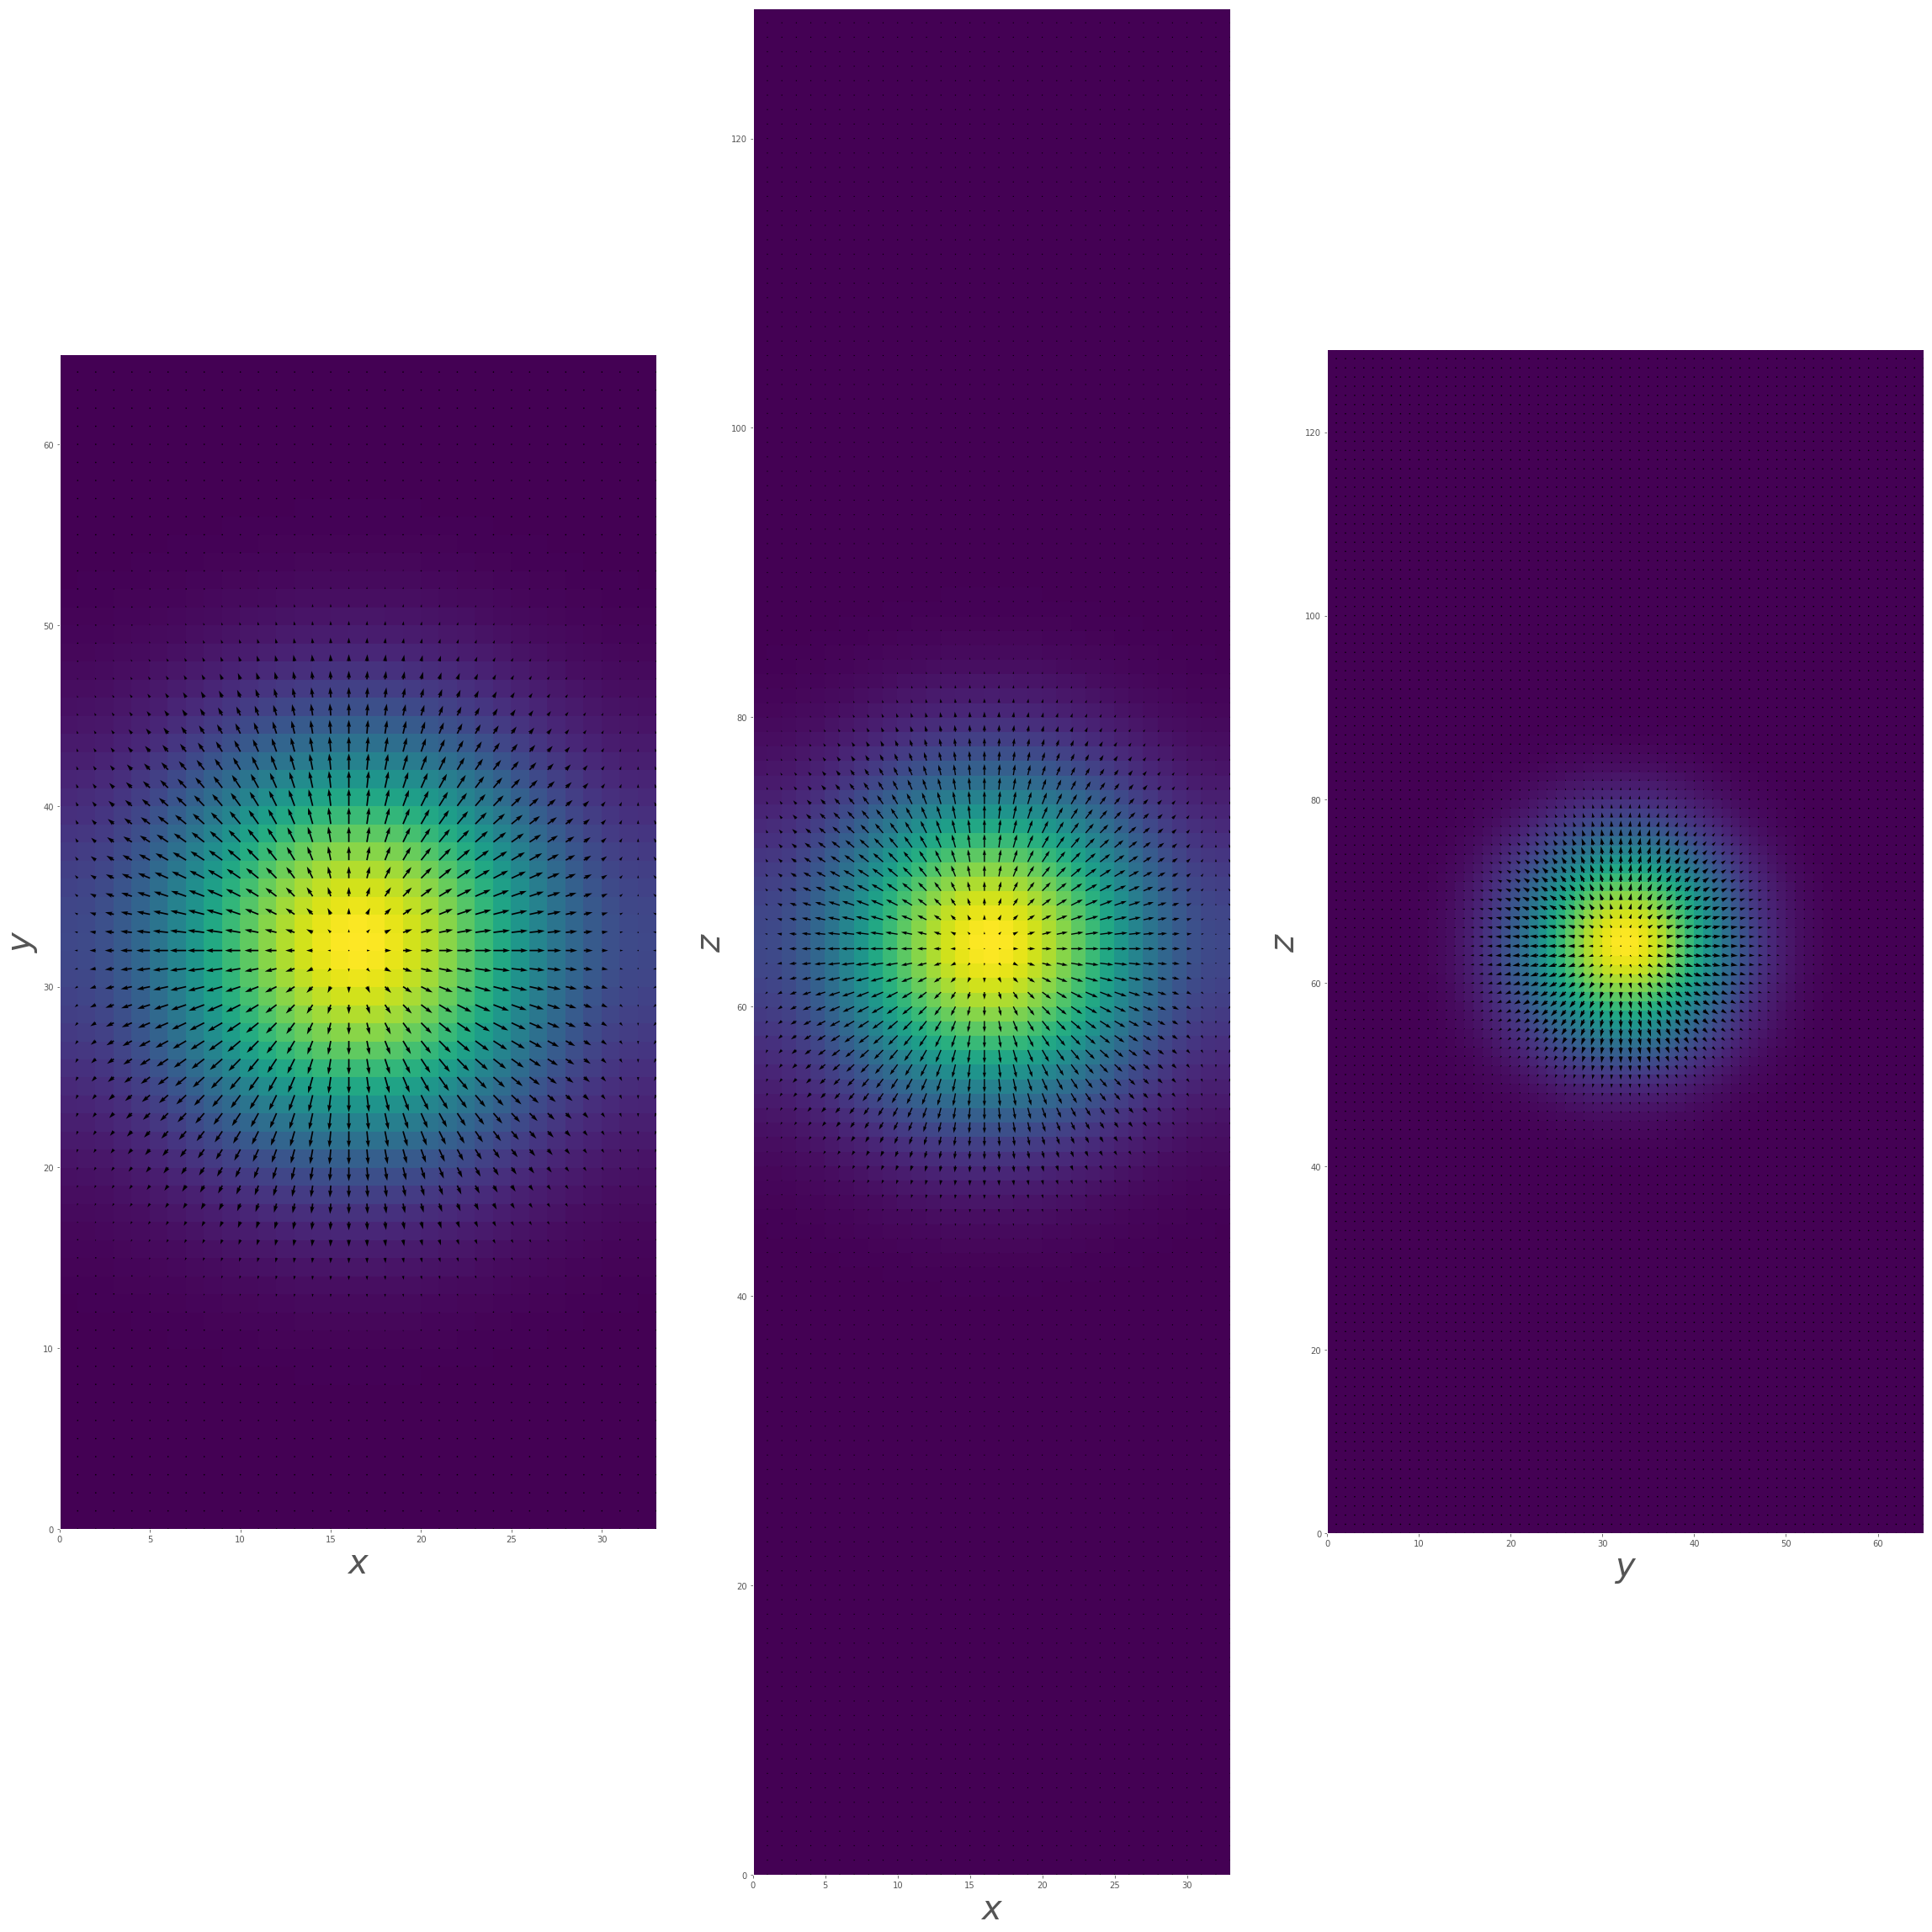

In [105]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyvisfile.silo import SiloFile, DB_READ
mpl.style.use('ggplot')

# Note : We hacked the silo format by inverting order of axes, need to reverse here
def readSiloVar1(f, name):
    return np.transpose(f.get_quadvar(name).vals[0])
def readSiloVar(f, name):
    return np.array([np.transpose(x) for x in f.get_quadvar(name).vals][::-1])
def readSiloQuad(f, name):
    return [x for x in f.get_quadmesh(name).coords][::-1]

f = SiloFile('data_00005.silo', create=False, mode=DB_READ)
print(f.get_toc().qmesh_names)
print(f.get_toc().qvar_names)
[x,y,z] = readSiloQuad(f, 'grid')
X,Y,Z   = np.meshgrid(x,y,z, indexing='ij')
rho     = readSiloVar1(f, 'rho')
flux    = readSiloVar(f, 'flux')
nx, ny, nz = x.size, y.size, z.size
print('ns  : ', nx,ny,nz)
print('Ns  : ', X.shape, Y.shape, Z.shape)
print('rho : ', rho.shape)
print('flux: ', flux.shape)
f.close()

%matplotlib inline
fig, [ax,bx,cx] = plt.subplots(figsize=(32,32), ncols=3)
# xy
ax.pcolormesh(X[...,nz//2],Y[...,nz//2],rho[...,nz//2])
ax.quiver(X[...,nz//2], Y[...,nz//2], flux[0,...,nz//2], flux[1,...,nz//2], units='xy', scale=.05)
# xz
bx.pcolormesh(X[:,ny//2,:],Z[:,ny//2,:],rho[:,ny//2,:])
bx.quiver(X[:,ny//2,:], Z[:,ny//2,:], flux[0,:,ny//2,:], flux[2,:,ny//2,:], units='xy', scale=.05)
# yz
cx.pcolormesh(Y[nx//2,...],Z[nx//2,...],rho[nx//2,...])
cx.quiver(Y[nx//2,...], Z[nx//2,...], flux[1,nx//2,...], flux[2,nx//2,...], units='xy', scale=.05)
for xx,l in zip([ax,bx,cx], [[r'$x$', r'$y$'], [r'$x$', r'$z$'], [r'$y$', r'$z$']]):
    xx.set_aspect('equal')
    xx.set_xlabel(l[0], fontsize=40)
    xx.set_ylabel(l[1], fontsize=40)
fig.tight_layout()